In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline


In [54]:
data = pd.read_csv('DATA.csv',sep=',')

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [5]:
sns.set()

In [6]:
def bar_chart(feature):
    yes =data[data['Y']==1][feature].value_counts()
    no = data[data['Y']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['yes','no']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

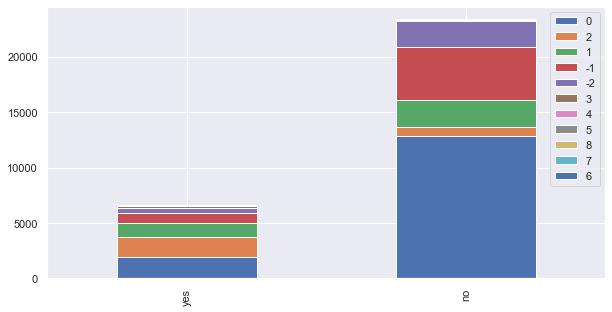

In [7]:
bar_chart('X6')

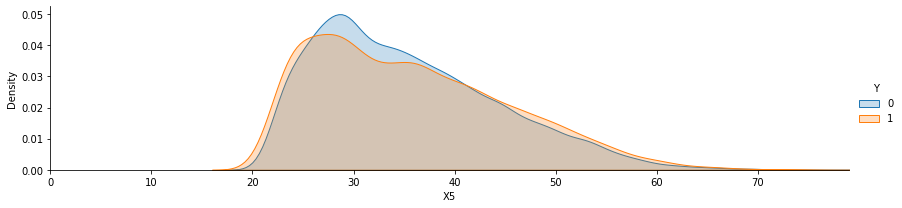

In [55]:
facet = sns.FacetGrid(data, hue="Y",aspect=4)
facet.map(sns.kdeplot,'X5',shade= True)
facet.set(xlim=(0, data['X5'].max()))
facet.add_legend()
 
plt.show()

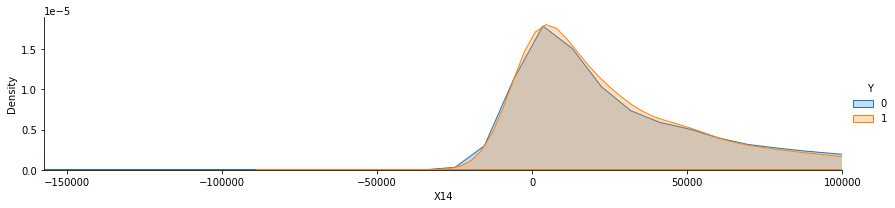

In [77]:
#X12-17
facet = sns.FacetGrid(data, hue="Y",aspect=4)
facet.map(sns.kdeplot,'X14',shade= True)
facet.set(xlim=(data['X14'].min(), 100000))
facet.add_legend()
 
plt.show()

In [9]:
#檢查數值X3
data.groupby(['X3']).size()

X3
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
dtype: int64

In [10]:
data = data.replace({'X3':{0:4,5:4,6:4}})

In [11]:
#檢查數值X4
data.groupby(['X4']).size()

X4
0       54
1    13659
2    15964
3      323
dtype: int64

In [12]:
data = data.replace({'X4':{0:3}})

In [20]:
#檢查X6-11
data.groupby(['X6']).size()

X6
-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
dtype: int64

In [18]:
data = data.replace({'X6':{-2:-1,0:-1}})

In [18]:
data = data.replace({'X7':{-2:-1,0:-1}})

In [18]:
data = data.replace({'X8':{-2:-1,0:-1}})

In [18]:
data = data.replace({'X9':{-2:-1,0:-1}})

In [18]:
data = data.replace({'X10':{-2:-1,0:-1}})

In [18]:
data = data.replace({'X11':{-2:-1,0:-1}})

In [71]:
data.X12.min()

-165580

In [77]:
data.groupby(['X18']).size()

X18
0         5249
1            9
2           14
3           15
4           18
          ... 
405016       1
423903       1
493358       1
505000       1
873552       1
Length: 7943, dtype: int64

In [21]:
#save clean data to csv
data.to_csv('clean_data.csv', index=False)

# data imbalance

In [22]:
data = pd.read_csv('clean_data.csv')

In [23]:
data['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

C:\Users\HHW\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

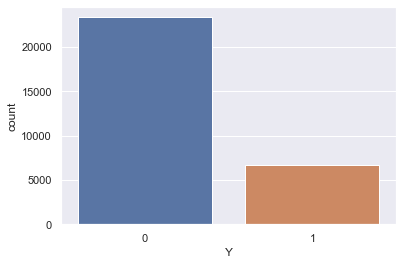

In [24]:
sns.countplot(data['Y'])

In [30]:
from sklearn.utils import resample
df_majority = data[(data['Y'] == 0)]
df_minority = data[(data['Y'] == 1)]
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 23364,
                                random_state = 42)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


In [26]:
df_upsampled

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
3868,80000,2,2,1,43,-1,-1,-1,-1,-1,...,-300,-300,-300,381,607,0,0,0,598,1
24135,180000,2,4,2,29,-1,-1,-1,-1,-1,...,0,0,2150,0,0,0,0,2150,0,1
23287,130000,2,3,1,39,-1,-1,2,-1,-1,...,97990,100160,102190,8900,0,3600,3800,3800,5000,1
23087,100000,2,2,1,36,2,2,2,2,2,...,79071,76918,81713,3500,3300,3000,0,6500,3000,1
16612,130000,1,1,2,27,2,2,2,-1,-1,...,69435,67790,69248,3500,0,2798,3500,2627,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000,1,2,1,41,-1,-1,-1,-1,-1,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,10000,1,3,1,43,-1,-1,-1,-1,-1,...,0,0,0,2000,0,0,0,0,0,0
29993,100000,1,1,2,38,-1,-1,-1,-1,-1,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,220000,1,3,1,39,-1,-1,-1,-1,-1,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


In [32]:
df_upsampled['Y'].value_counts()

1    23364
0    23364
Name: Y, dtype: int64

C:\Users\HHW\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

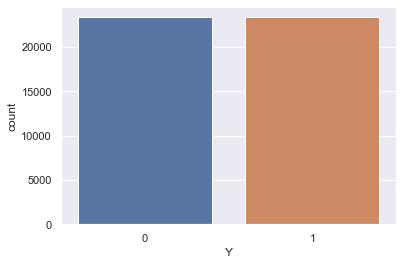

In [33]:
sns.countplot(df_upsampled['Y'])

In [34]:
df_upsampled.to_csv('clean_upsampled_data.csv', index = False)

# data Discretization

In [17]:
data = pd.read_csv('clean_upsampled_data.csv')

In [6]:
from feature_engine.discretisation import DecisionTreeDiscretiser

In [9]:
x = data.drop('Y', axis = 1)
y = data['Y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
predicted = []
expected = []
discret = DecisionTreeDiscretiser()
discret.fit(x_train,y_train)


DecisionTreeDiscretiser()

In [83]:
def equiwidth(arr1, m):
    a = len(arr1)
    w = int((max(arr1) - min(arr1)) / m)
    min1 = min(arr1)
    arr = []
    for i in range(0, m + 1):
        arr = arr + [min1 + w * i]
    arri=[]
     
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    print(arri)

In [47]:
# equal frequency
def equifreq(arr1, m):   
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)

In [92]:
#檢查數值X1
data.groupby(['X1']).size()

X1
0    7727
1    6133
2    5228
3    4791
4    5628
5    5693
6    5784
7    5744
dtype: int64

In [86]:
arr1=X1
m=8
equifreq(arr1,m)

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000

In [71]:
data.loc[data['X1'] <= 30000, 'X1'] = 0
data.loc[(data['X1'] > 30000) & (data['X1'] <= 50000), 'X1'] = 1
data.loc[(data['X1'] > 50000) & (data['X1'] <= 80000), 'X1'] = 2
data.loc[(data['X1'] > 80000) & (data['X1'] <= 120000), 'X1'] = 3
data.loc[(data['X1'] > 120000) & (data['X1'] <= 170000), 'X1'] = 4
data.loc[(data['X1'] > 170000) & (data['X1'] <= 220000), 'X1'] = 5
data.loc[(data['X1'] > 220000) & (data['X1'] <=310000), 'X1'] = 6
data.loc[data['X1'] > 310000, 'X1'] = 7

In [93]:
#檢查數值X5
data.groupby(['X5']).size()

X5
0    4536
1    6067
2    4513
3    3844
4    5228
5    3453
6    4499
7    4999
8    5215
9    4374
dtype: int64

In [142]:
X5 = data['X5'].sort_values().to_numpy()

X5

array([21, 21, 21, ..., 75, 75, 79], dtype=int64)

In [90]:
arr1=X5
m=10
equifreq(arr1,m)

[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,

In [72]:
data.loc[ data['X5'] <= 24, 'X5'] =0
data.loc[(data['X5'] > 24) & (data['X5'] <= 27), 'X5'] =1
data.loc[(data['X5'] > 27) & (data['X5'] <= 29), 'X5'] =2
data.loc[(data['X5'] > 29) & (data['X5'] <= 31), 'X5'] =3
data.loc[(data['X5'] > 31) & (data['X5'] <= 34), 'X5'] =4
data.loc[(data['X5'] > 34) & (data['X5'] <= 36), 'X5'] =5
data.loc[(data['X5'] > 36) & (data['X5'] <= 39), 'X5'] =6
data.loc[(data['X5'] > 39) & (data['X5'] <= 43), 'X5'] =7
data.loc[(data['X5'] > 43) & (data['X5'] <= 49), 'X5'] =8
data.loc[ data['X5'] >49, 'X5'] =9

In [147]:
#檢查數值X12-X17
data.groupby(['X17']).size()

X17
0     7483
1    11947
2     8412
3     7779
4     5764
5     5343
dtype: int64

In [96]:
X12 = data.X12.sort_values().to_numpy()

In [97]:
arr1 = X12[X12>0]
m = 5
equifreq(arr1,m)

[1, 3, 3, 8, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 14, 27, 28, 31, 32, 32, 32, 32, 32, 37, 38, 47, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 54, 54, 54, 54, 54, 54, 55, 56, 59, 59, 59, 59, 65, 65, 65, 65, 65, 66, 66, 67, 69, 70, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 75, 76, 77, 77, 77, 78, 78, 80, 80, 80, 85, 86, 86, 88, 90, 90, 90, 90, 90, 90, 90, 92, 92, 95, 95, 96, 98, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 103, 103, 103, 103, 103, 105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 107, 107, 108, 108, 108, 108, 110, 110, 110, 110, 110, 110, 111, 113, 113, 115, 115, 115, 115, 115, 115, 115, 117, 117, 120, 121, 122, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 125, 125, 130, 132, 134, 134, 136, 140, 140, 140, 140, 140, 140, 140, 140, 141, 142, 142, 142, 142, 142, 142, 144, 145, 145, 146, 147, 148, 148, 148, 148, 148, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150

[42795, 42795, 42795, 42807, 42807, 42807, 42815, 42815, 42820, 42821, 42822, 42825, 42838, 42856, 42856, 42856, 42856, 42856, 42856, 42863, 42867, 42867, 42867, 42867, 42867, 42874, 42883, 42897, 42897, 42897, 42897, 42897, 42897, 42897, 42922, 42922, 42923, 42931, 42932, 42932, 42932, 42933, 42941, 42946, 42950, 42950, 42950, 42950, 42972, 42974, 42980, 43024, 43027, 43030, 43045, 43045, 43045, 43045, 43045, 43045, 43047, 43048, 43050, 43051, 43062, 43063, 43063, 43063, 43068, 43071, 43072, 43087, 43087, 43087, 43087, 43087, 43098, 43098, 43099, 43099, 43127, 43127, 43127, 43128, 43140, 43165, 43165, 43165, 43165, 43165, 43170, 43175, 43200, 43205, 43205, 43205, 43205, 43205, 43205, 43206, 43210, 43214, 43219, 43221, 43226, 43243, 43243, 43243, 43244, 43247, 43247, 43247, 43247, 43259, 43265, 43268, 43272, 43272, 43273, 43275, 43286, 43293, 43310, 43311, 43314, 43314, 43314, 43314, 43314, 43314, 43321, 43321, 43321, 43321, 43333, 43334, 43340, 43341, 43342, 43343, 43343, 43343, 43346

In [94]:
#maping X12-17
def data_maping(column):
    data.loc[data[column] <=0, column] =0
    data.loc[(data[column] > 0) & (data[column] <= 10000), column] =1
    data.loc[(data[column] > 10000) & (data[column] <= 25000), column] =2
    data.loc[(data[column] > 25000) & (data[column] <= 50000), column] =3
    data.loc[(data[column] > 50000) & (data[column] <= 100000), column] =4
    data.loc[data[column] > 100000, column] =5

In [95]:
data_maping('X12')
data_maping('X13')
data_maping('X14')
data_maping('X15')
data_maping('X16')
data_maping('X17')

In [10]:
#檢查數值X18-X23
data.groupby(['X20']).size()

X20
0    10847
1    11152
2    13538
3    11191
dtype: int64

In [54]:
X18 = data.X18.sort_values().to_numpy()

In [55]:
equifreq(X18[X18>0], 5)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17

[6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6802, 6804, 6806, 6808, 6808, 6808, 6809, 6809, 6809, 6813, 6814, 6815, 6817, 6817, 6818, 6820, 6820, 6820, 6820, 6820, 6820, 6831, 6835, 6836, 6836, 6836, 6836, 6838, 6840, 6840, 6845, 6846, 6847, 6847, 6849, 6852, 6854, 6855, 6859, 6860, 6861, 6865, 6865, 6865, 6865, 6865, 6867, 6869, 6871, 6873, 6873, 6874, 6874, 6876, 6877, 6879, 6880, 6885, 6885, 6885, 6885, 6887, 6887, 6888, 6891, 6891, 6892, 6892, 6894, 6895, 6896, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6900, 6901, 6906, 6911, 6911, 6913, 6914, 6914, 6914, 6914, 6914, 6914, 6918, 6918, 6918, 6918, 6918, 6918, 6918, 6919, 6922, 6926, 6929, 6930, 6930, 6931, 6934, 6936, 6942, 6944, 6949, 6950, 6959, 6959, 6959, 6959, 6959, 6959, 6959, 6959, 6960, 6960, 6963, 6964, 6972, 6978, 6983, 6987, 6987, 6987, 6987, 6987, 6989, 6990, 6996, 6996, 6996, 6996, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 700

In [128]:
#maping X18-23
def data_maping(column):
    data.loc[data[column] <=0, column] =0
    data.loc[(data[column] > 0) & (data[column] <= 1405), column] =1
    data.loc[(data[column] > 1405) & (data[column] <= 2008), column] =2
    data.loc[(data[column] > 2008) & (data[column] <= 3500), column] =3
    data.loc[(data[column] > 3500) & (data[column] <= 6800), column] =4
    data.loc[data[column] > 6800, column] =5

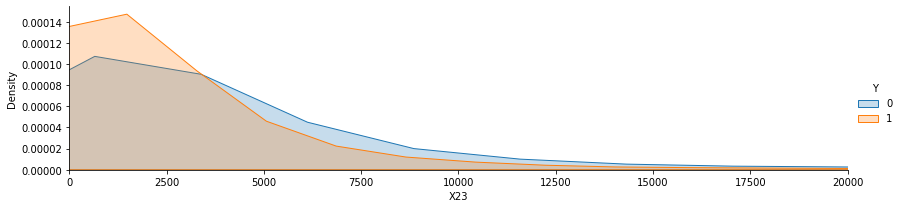

In [5]:
facet = sns.FacetGrid(data, hue="Y",aspect=4)
facet.map(sns.kdeplot,'X23',shade= True)
facet.set(xlim=(data['X23'].min(), 20000))
facet.add_legend()
 
plt.show()

In [8]:
#maping X18-23
def data_maping(column):
    data.loc[data[column] <=0, column] =0
    data.loc[(data[column] > 0) & (data[column] <= 1400), column] =1
    data.loc[(data[column] > 1400) & (data[column] <= 4000), column] =2
   
    
    data.loc[data[column] > 4000, column] =3

In [9]:
data_maping('X18')
data_maping('X19')
data_maping('X20')
data_maping('X21')
data_maping('X22')
data_maping('X23')

In [11]:
data.head(50)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2,2,2,1,7,-1,-1,-1,-1,-1,...,0,0,0,1,1,0,0,0,1,1
1,5,2,4,2,2,-1,-1,-1,-1,-1,...,0,0,1,0,0,0,0,2,0,1
2,4,2,3,1,6,-1,-1,2,-1,-1,...,4,5,5,3,0,2,2,2,3,1
3,3,2,2,1,5,2,2,2,2,2,...,4,4,4,2,2,2,0,3,2,1
4,4,1,1,2,1,2,2,2,-1,-1,...,4,4,4,2,0,2,2,2,2,1
5,2,1,2,2,9,-1,-1,-1,-1,-1,...,2,2,2,2,2,2,2,2,2,1
6,5,2,1,2,4,1,2,2,-1,-1,...,1,1,1,0,0,1,1,1,0,1
7,4,2,1,1,6,-1,-1,-1,-1,-1,...,0,1,1,1,1,0,1,1,1,1
8,4,1,2,1,9,2,2,2,2,2,...,4,4,4,2,2,2,2,2,2,1
9,1,2,1,2,9,3,2,-1,-1,-1,...,0,0,0,0,1,0,0,0,0,1


In [14]:
data.to_csv('final_cleaning_upsampled_data.csv', index = False)

# normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Y = data.Y
data = data.drop(['Y'],axis=1)

In [ ]:
name = data.columns
scaler = MinMaxScaler(feature_range=(-1,1))
data_n = scaler.fit_transform(data)

In [ ]:
data_n = pd.DataFrame(data_n, columns = name)

In [ ]:
data_n = pd.concat([data_n,Y],axis=1)

In [ ]:
data_n.to_csv('data_n_finalclean.csv', index = False)

# Randomforest

In [39]:
data = pd.read_csv('data_n_finalclean.csv')

In [15]:
x = data.drop('Y', axis = 1)
y = data['Y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
predicted = []
expected = []
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
expected.extend(y_test)
predicted.extend(forest.predict(x_test))

In [16]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3,4],average='weighted'))

Macro-average: 0.904792143507525
Micro-average: 0.9050574220700478
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6966
           1       0.87      0.95      0.91      7053

    accuracy                           0.91     14019
   macro avg       0.91      0.90      0.90     14019
weighted avg       0.91      0.91      0.90     14019

[[5974  992]
 [ 339 6714]]
Accuracy: 90.51%
Average = macro
precision: 0.908785211997917
recall: 0.9047646873988295
F1-score: 0.22745443458228876


Average = micro
precision: 0.9050574220700478
recall: 0.9050574220700478
F1-score: 0.909817738329155


Average = weighted
precision: 0.9085523923828958
recall: 0.9050574220700478
F1-score: 0.909817738329155


C:\Users\HHW\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HHW\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
data = pd.read_csv('data_n_finalclean.csv')

In [ ]:
x = data.drop('Y', axis = 1)
y = data['Y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
predicted = []
expected = []
svm =SVC(gamma='scale',
        decision_function_shape='ovo')
svm.fit(x_train,y_train)
expected.extend(y_test)
predicted.extend(svm.predict(x_test))

In [ ]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3,4],average='weighted'))

# DNN

In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# 機器學習模組
import sklearn
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adamax
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('data_n_finalclean.csv')

In [ ]:
x = data.drop('Y', axis = 1)
y = data['Y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
x.shape

In [ ]:
model = Sequential()
model.add(Dense(input_dim=23, units=1000, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(units=500))
model.add(Activation('tanh'))
model.add(Dropout(0.25))
model.add(Dense(units=100))
model.add(Activation('tanh'))
model.add(Dense(units=50))
model.add(Activation('tanh'))
model.add(Dense(units=10))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy']
)

In [ ]:
train_history = model.fit(x = x_train,
                          y = y_train,
                          validation_split = 0.2,
                          verbose = 2,
                          epochs = 2000)

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(show_train_value,test_value):
    plt.plot(train_history.history[show_train_value])
    plt.plot(train_history.history[test_value])
    plt.title('Train History')
    plt.ylabel(show_train_value)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [ ]:
model.evaluate(x_test,y_test)